In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
dt = pd.read_csv("D:\KULIAH\sales_data.csv")

In [3]:
dt.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')

In [5]:
sns.set()

### Distribusi Umur

C:\Users\dinda\AppData\Local\Temp\ipykernel_3616\3089949573.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dt['Customer_Age'], bins=10);


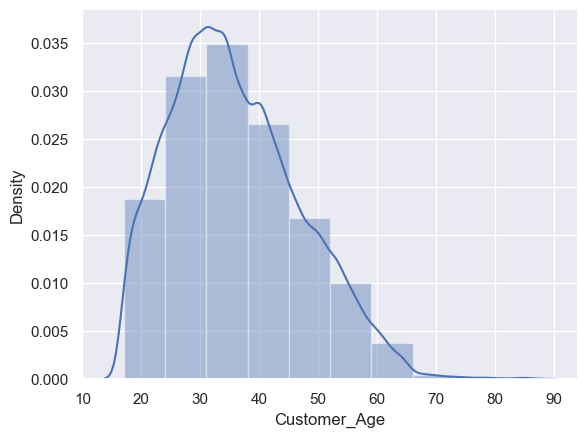

In [16]:
sns.distplot(dt['Customer_Age'], bins=10);

### korelasi umur dan profit

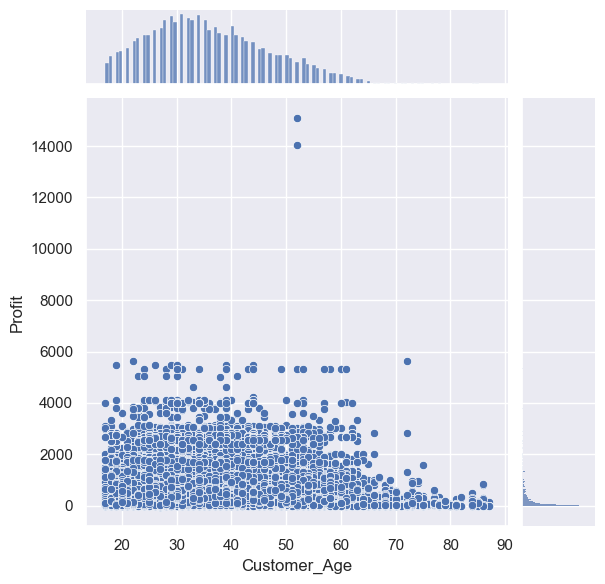

In [38]:
sns.jointplot(x='Customer_Age', y='Profit', data=dt)

In [39]:
dt[dt['Profit']>12000]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
112072,2013-07-24,24,July,2013,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",27,1482,2384,14055,40014,54069
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58074


In [3]:
dt_clean = dt.drop([112072, 112073])

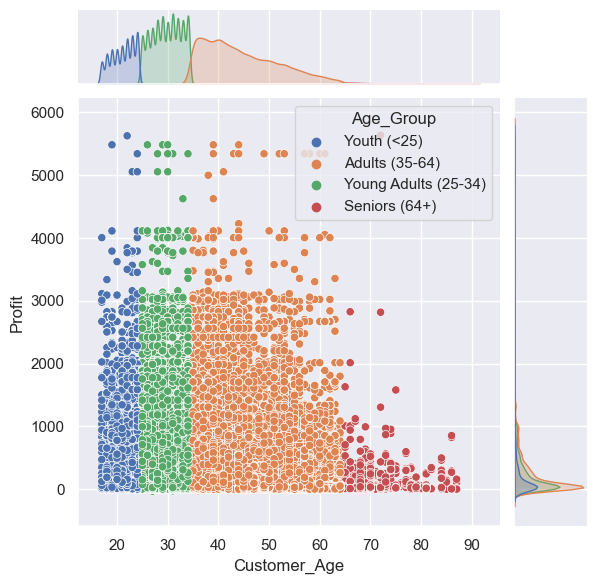

In [47]:
sns.jointplot(x='Customer_Age', y='Profit', data=dt_clean, hue='Age_Group')

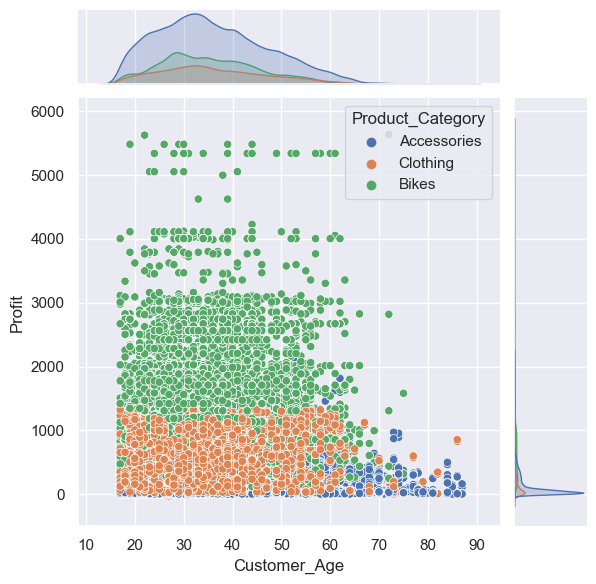

In [6]:
sns.jointplot(x='Customer_Age', y='Profit', data=dt_clean, hue='Product_Category')

### Hitung korelasi semua variabel

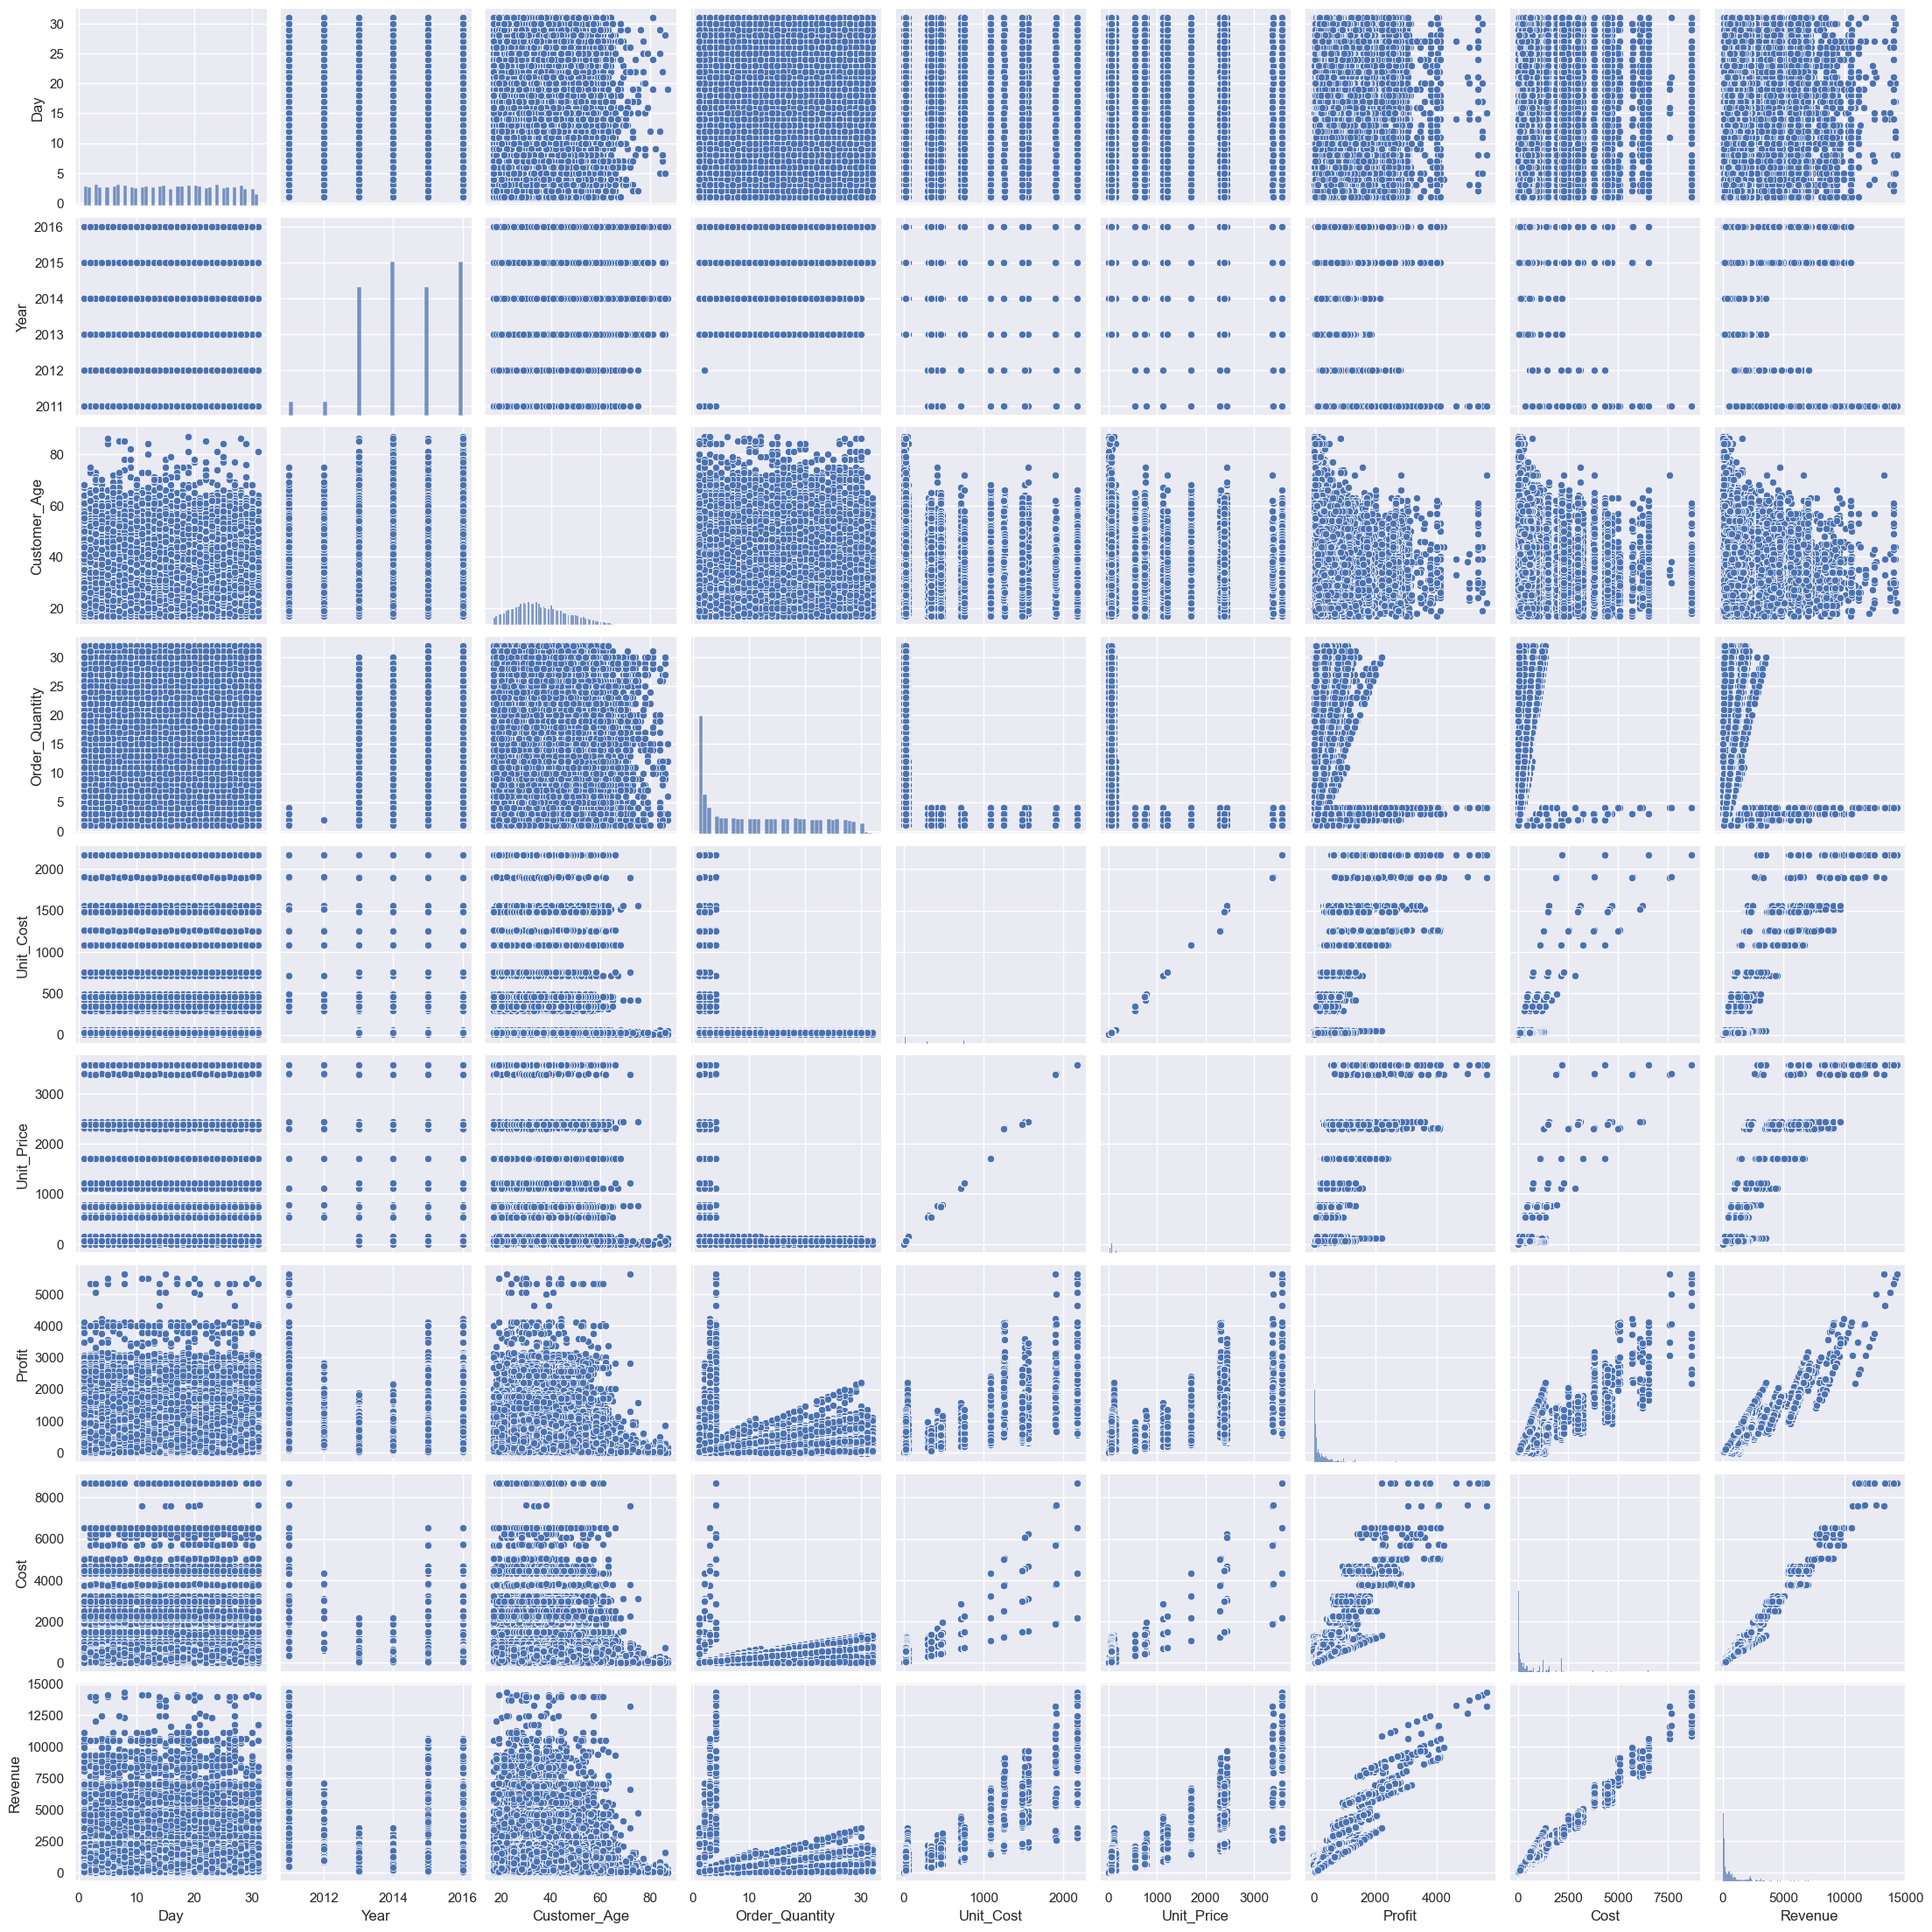

In [8]:
sns.pairplot(dt_clean)

C:\Users\dinda\AppData\Local\Temp\ipykernel_17272\3293140563.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dt.corr())


<AxesSubplot: >

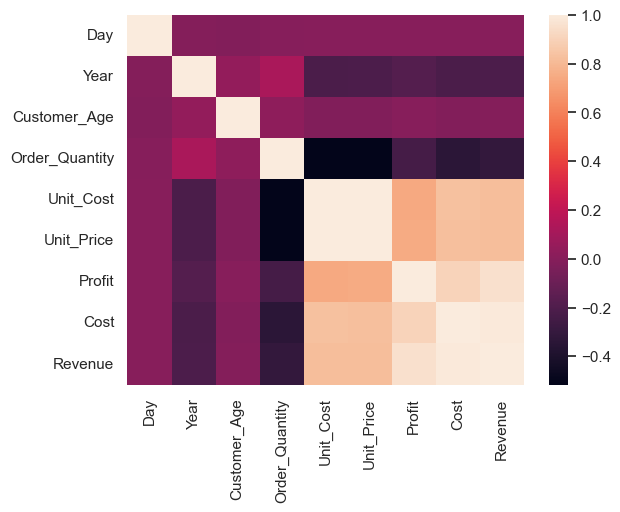

In [9]:
sns.heatmap(dt.corr())

In [38]:
dt_filter = dt[(dt['Profit']>1000) & (dt['Profit']<3000)]

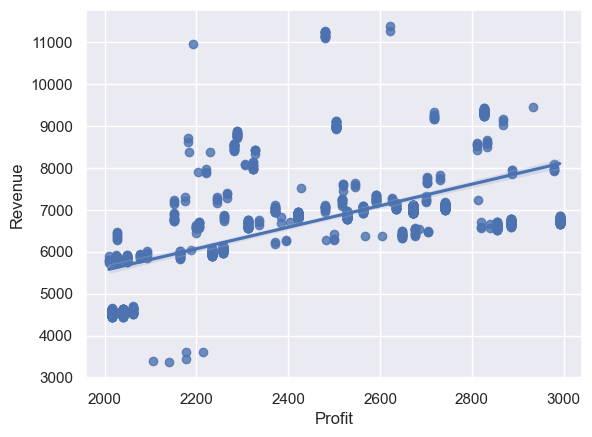

In [36]:
sns.regplot(x="Profit", y="Revenue", y_jitter=100, data=dt_filter);

<AxesSubplot: xlabel='Unit_Price', ylabel='Revenue'>

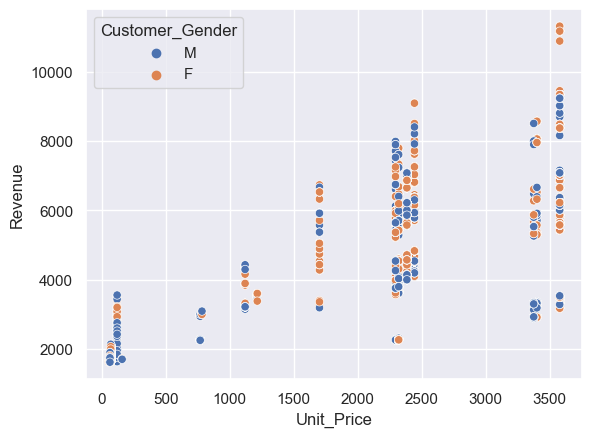

In [39]:
sns.scatterplot(x="Unit_Price", y="Revenue", data=dt_filter, hue='Customer_Gender')

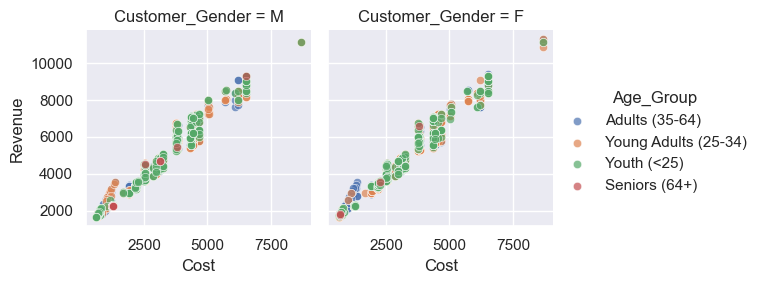

In [40]:
g = sns.FacetGrid(dt_filter, col="Customer_Gender", hue="Age_Group")
g.map(sns.scatterplot, "Cost", "Revenue", alpha=.7)
g.add_legend()

c:\Python\Python310\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


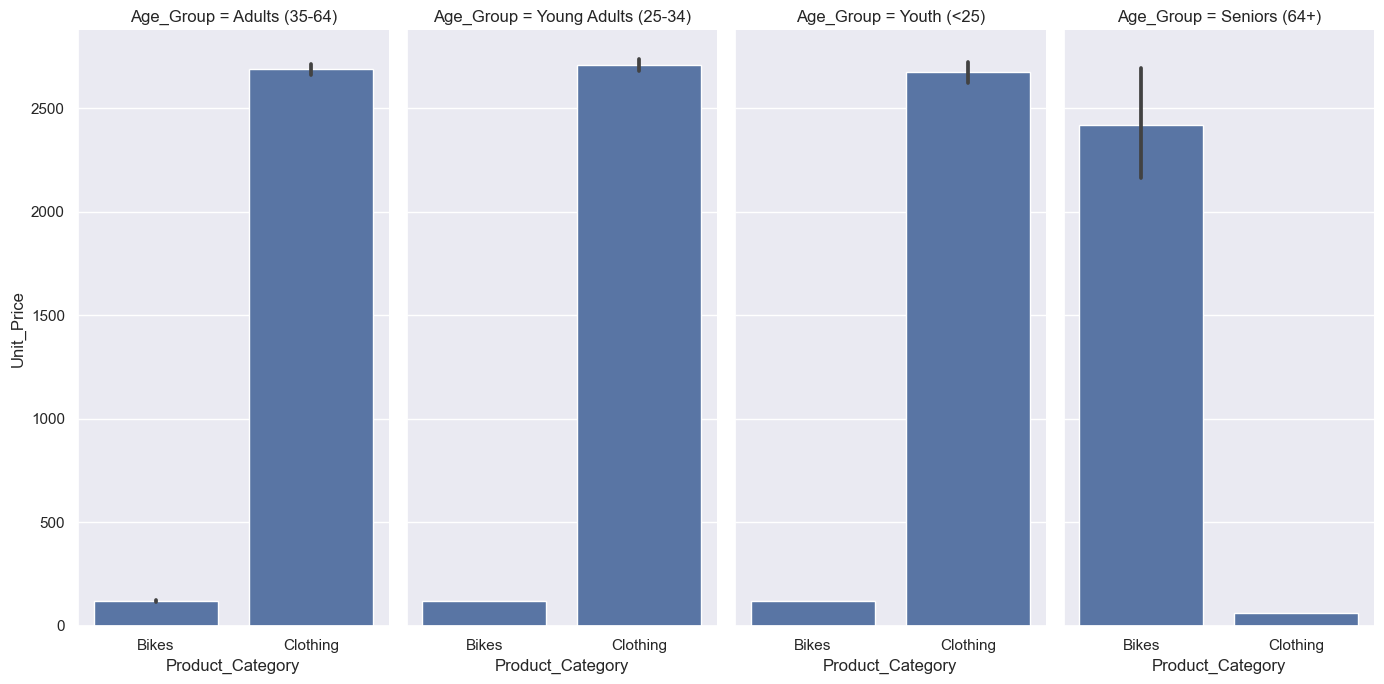

In [61]:
g = sns.FacetGrid(dt_filter, col="Age_Group", height=7, aspect=.5)
g.map(sns.barplot, "Product_Category", "Unit_Price")

<AxesSubplot: xlabel='Product_Category', ylabel='Unit_Price'>

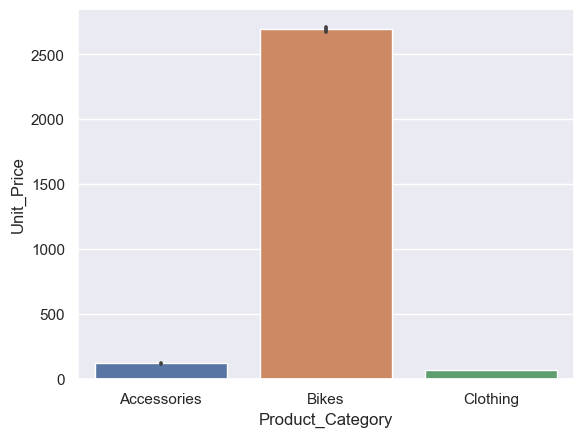

In [63]:
sns.barplot (x="Product_Category", y="Unit_Price", data=dt_filter)